In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

def generate_data(n_dim, num_anomaly=10, num_normal=200):
    np.random.seed(123) # 乱数固定

    # 平均と分散
    mean1 = np.array([2]*n_dim)
    mean2 = np.array([-2]*n_dim)
    cov = np.eye(n_dim)

    # 正常データの生成(2つの正規分布から生成)
    norm1 = np.random.multivariate_normal(mean1, cov, size=num_normal//2)
    norm2 = np.random.multivariate_normal(mean2, cov, size=num_normal//2)

    # 異常データの生成(一様分布から生成)
    lower, upper = -10, 10
    anom = (upper - lower)*np.random.rand(num_anomaly, n_dim) + lower

    df = np.vstack([norm1, norm2, anom])
    df = pd.DataFrame(df, columns=[f"feat{i}" for i in range(1, n_dim+1)])

    df_label = np.array([1]*num_normal + [-1]*num_anomaly)
    
    return df, df_label

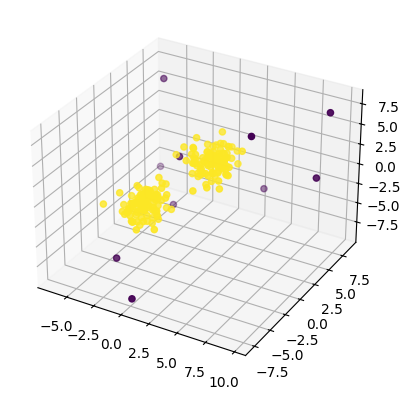

In [19]:
# データの生成
df, df_label = generate_data(n_dim=3, num_anomaly=10, num_normal=200)

# データの可視化
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['feat1'], df['feat2'], df['feat3'], c=df_label)
plt.show()


In [20]:
# 学習

clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
clf.fit(df)
df["predict"] = clf.predict(df)

# 正解率
accuracy_score(df_label, df["predict"])

0.9476190476190476

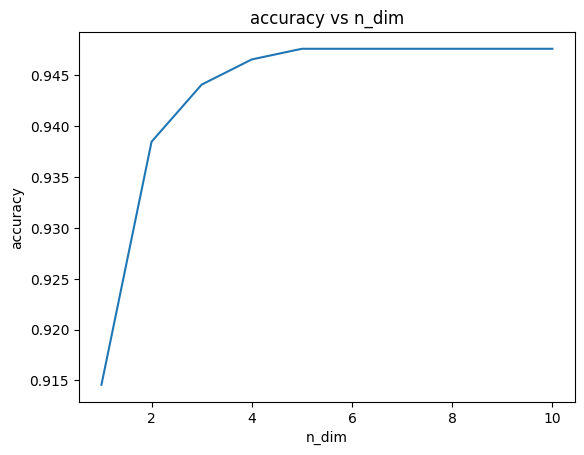

In [21]:
# データ生成の次元数を変更して正解率を計算
n_dim_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = []

for n_dim in n_dim_list:
    df, df_label = generate_data(n_dim=n_dim, num_anomaly=1000, num_normal=20000)

    clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
    clf.fit(df)
    df["predict"] = clf.predict(df)

    accuracy = accuracy_score(df_label, df["predict"])
    accuracy_list.append(accuracy)

plt.plot(n_dim_list, accuracy_list)
plt.xlabel("n_dim")
plt.ylabel("accuracy")
plt.title("accuracy vs n_dim")
plt.show()


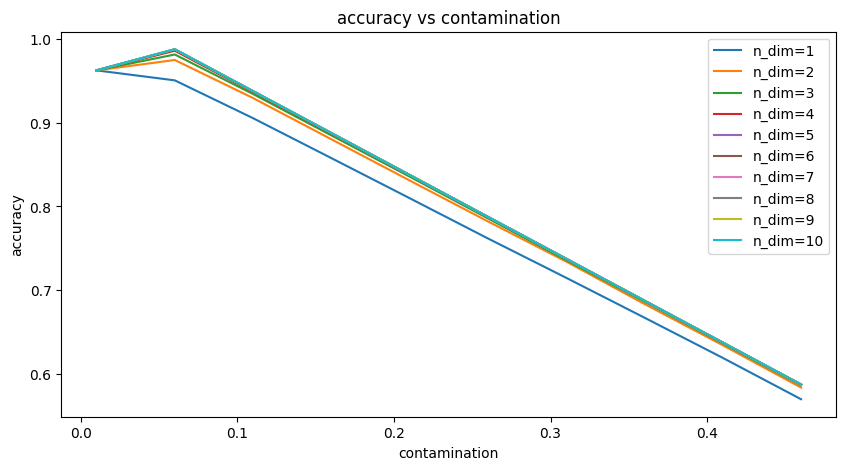

In [22]:
# 次元数とcontaminationの関係を調べる
n_dim_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
contamination_list = list(np.arange(0.01, 0.5, 0.05))
accuracy_list = []

for n_dim in n_dim_list:
    df, df_label = generate_data(n_dim=n_dim, num_anomaly=1000, num_normal=20000)
    accuracy_list.append([])
    for contamination in contamination_list:
        clf = IsolationForest(n_estimators=100, contamination=contamination, random_state=123)
        clf.fit(df)
        df["predict"] = clf.predict(df)

        accuracy = accuracy_score(df_label, df["predict"])
        accuracy_list[-1].append(accuracy) 

# 描画
plt.figure(figsize=(10, 5))
for i, n_dim in enumerate(n_dim_list):
    plt.plot(contamination_list, accuracy_list[i], label=f"n_dim={n_dim}")
plt.xlabel("contamination")
plt.ylabel("accuracy")
plt.title("accuracy vs contamination")
plt.legend()
plt.show()

In [23]:
# ノイズとなる特徴量を追加して精度を確認
n_dim = 10
noise_dim = 10
df, df_label = generate_data(n_dim=n_dim, num_anomaly=1000, num_normal=20000)
df_noise = np.random.randn(df.shape[0], noise_dim)
df_noise = pd.DataFrame(df_noise, columns=[f"noise{i}" for i in range(1, noise_dim+1)])
df = pd.concat([df, df_noise], axis=1)

# データの確認
df.head()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9,noise10
0,0.914369,2.997345,2.282978,0.493705,1.421400,3.651437,-0.426679,1.571087,3.265936,1.133260,1.687712,-0.450748,-0.386586,1.031520,0.300311,0.283845,0.026099,0.594227,-0.761546,-1.269734
1,1.321114,1.905291,3.491390,1.361098,1.556018,1.565649,4.205930,4.186786,3.004054,2.386186,0.182675,-1.002480,-0.786476,-0.689359,0.582804,-1.212437,-1.536477,-0.638859,-0.848646,0.419433
2,2.737369,3.490732,1.064166,3.175829,0.746119,1.362248,2.907105,0.571319,1.859931,1.138245,-0.517869,-0.702697,2.595345,-1.767210,-0.468300,-0.255571,-0.686737,0.552686,0.146953,-0.237244
3,1.744381,-0.798589,0.228467,1.300123,2.927462,1.826364,2.002846,2.688223,1.120464,2.283627,0.282297,0.028242,1.095037,0.284855,-1.971460,-0.469067,0.238949,-0.844398,-1.151351,-0.296507
4,1.194633,0.272331,1.609100,2.573806,2.338589,1.988170,4.392365,2.412912,2.978736,4.238143,2.925657,0.479093,-0.348080,1.352868,0.656561,-1.120233,0.913838,-0.010848,1.181936,-0.131028


In [24]:
# 学習
sk_df = df.copy()

clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
clf.fit(sk_df)
sk_df["predict"] = clf.predict(sk_df)

# 正解率
accuracy_score(df_label, sk_df["predict"])


0.9472380952380952

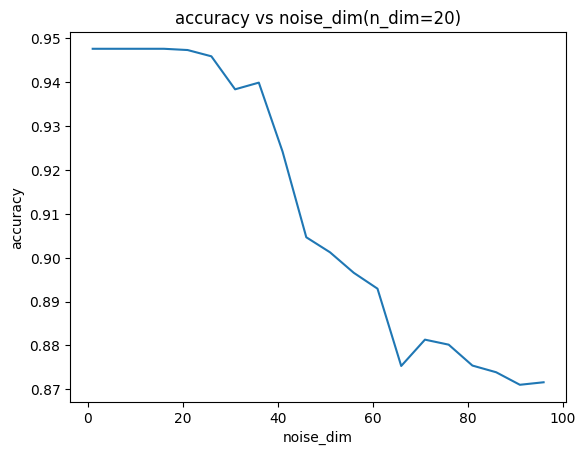

In [25]:
# ノイズの次元数を変更して精度を確認
n_dim = 20
noise_dim_list = list(range(1, 101, 5))
accuracy_list = []

df, df_label = generate_data(n_dim=n_dim, num_anomaly=1000, num_normal=20000)
for noise_dim in noise_dim_list:
    df_noise = np.random.randn(df.shape[0], noise_dim)
    df_noise = pd.DataFrame(df_noise, columns=[f"noise{i}" for i in range(1, noise_dim+1)])
    df = pd.concat([df, df_noise], axis=1)

    clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
    clf.fit(df)
    df["predict"] = clf.predict(df)

    accuracy = accuracy_score(df_label, df["predict"])
    accuracy_list.append(accuracy)

plt.plot(noise_dim_list, accuracy_list)
plt.xlabel("noise_dim")
plt.ylabel("accuracy")
plt.title("accuracy vs noise_dim(n_dim={})".format(n_dim))
plt.show()


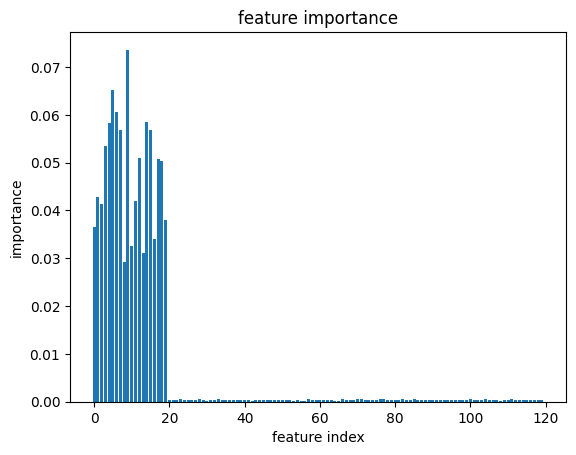

0.9476190476190476

In [26]:
# ノイズの特徴量を削除する特徴量選択を行う
from sklearn.ensemble import RandomForestClassifier

# データの生成
n_dim = 20
noise_dim = 100
df, df_label = generate_data(n_dim=n_dim, num_anomaly=1000, num_normal=20000)
df_noise = np.random.randn(df.shape[0], noise_dim)
df_noise = pd.DataFrame(df_noise, columns=[f"noise{i}" for i in range(1, noise_dim+1)])
df = pd.concat([df, df_noise], axis=1)

# ramdomforestを用いて特徴量選択
clf = RandomForestClassifier(n_estimators=100, random_state=123)
clf.fit(df, df_label)

# 特徴量の重要度
importances = clf.feature_importances_

# 特徴量の重要度を可視化
plt.bar(range(len(importances)), importances)
plt.xlabel("feature index")
plt.ylabel("importance")
plt.title("feature importance")
plt.show()

# 特徴量選択
threshold = 0.01
df_selected = df.loc[:, importances > threshold]

# 特徴量選択後のデータの確認
df_selected.head()

# 特徴量選択後のデータで学習
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
clf.fit(df_selected)
df["predict"] = clf.predict(df_selected)

# 正解率
accuracy_score(df_label, df["predict"])



In [27]:
# 特徴量選択の閾値を変更してAUCを計算
threshold_list = np.arange(0.01, 0.5, 0.01)
auc_list = []

for threshold in threshold_list:
    df_selected = df.loc[:, importances > threshold]

    clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=123)
    clf.fit(df_selected)
    df["predict"] = clf.predict(df_selected)

    accuracy = accuracy_score(df_label, df["predict"])
    auc_list.append(accuracy)

plt.plot(threshold_list, auc_list)
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.title("accuracy vs threshold")
plt.show()


IndexError: Boolean index has wrong length: 120 instead of 121